# The Cournot Model

### Imports:

In [1]:
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab
from scipy import optimize
#We initiate our printing as nice equations, using the sympy package 
sm.init_printing(use_unicode=True)


## Model Description

In the model of Cournot Competition, two firms compete for the amount they produce, by simulataneously setting quantities. 

**We use the following parameters:**

1. q1 is the quantity produced by firm 1
2. q2 is the quantity produced by firm 2
3. c is the cost, which is equal for both firms 
4. a,b are parameters of the price functions of the firms
5. pi1 and pi2 are profits of firms 1 and 2 

**Preliminaries of the model:**

1. Both firms produce a homogenous product
2. There is no collusion between the firms
3. Both firms have identical costs and the same price functions 
4. The firms are economically rational

**Prices evolve according to:**

p1 = (a-b*(q1+q2))

p2 = (a-b*(q1+q2))

**Profits are derived through:**

pi1 =(p1*q1-c*q1)

pi2 = (p2*q2-c*q2)



## Solving the model:

First we define all symbols:

In [2]:
#Here we define the symbols as sympy objects. This lets us use sympy operations on them 
#The qs are the quantities that firm 1 and firm 2 produce

q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
#c is the production cost, this is assumed to be constant 
c = sm.symbols('c')

# a is a parameter used to calculate the prices. 
a = sm.symbols('a')
#b is a substiotion parameter, that describes the substitution elasticity between firm 1 and firm 2's product. If b = 1 
# the products are perfect substitues, anything under 1 and above 1 is non-perfect. 
b = sm.symbols("b")

#Pi are the profits for the two firms
pi1 = sm.symbols('pi_1')
pi2 = sm.symbols('pi_2')

We use the price and profit equations, to then derive the first order conditions wrt. the quantity produced by the respective firm:

In [3]:
# The prices are defined as the parameter a minus the substitution parameter times the quantities of firm 1 and 2 
p1 = (a-b*(q1+q2))

p2 = (a-b*(q1+q2))


# The profit of the firm is given by the prices times quantity, minus the cost times the quantity
pi1 =(p1*q1-c*q1)

pi2 = (p2*q2-c*q2)

In [4]:
# In order to find the Cournot equilibrium, we need to begin by differentiating the two profit functions
# Here we use the sympy fuctionality to differentiante the profit function with regards to the qunatity
foc1=sm.diff(pi1,q1)
foc1

In [5]:
# Same as above, for firm 2
foc2=sm.diff(pi2,q2)
foc2

Setting first order conditions to 0 and solving for the respective firms produced quantitiy (q1 and q2), give us the optimal qunatities the two firms should produce, given the other firms output (reaction functions).

In [6]:
#Here we again use the sympy functionality to set the function = 0 by using sm.Eq, and thereafter solving it for the quantity
sol1= sm.solve(sm.Eq(foc1,0),q1)[0]
sol1

In [7]:
#Same as above for firm 2
sol2= sm.solve(sm.Eq(foc2,0),q2)[0]
sol2

The Cournot equlibrium is achieved, when substituting one firm's reaction function into the other firm's reaction function. This equlibrium constitutes the optimal quantity that both firms should produce, given that the other firm is rational and is aiming to produce the profit maximizing amount. 

We first substitute q2 in firm 1's fist order condition:

In [8]:
#Here we use sympy to substitute the optimizal quantity for firm 2, into the reaction curve for firm 1
sol1_subs = foc1.subs(q2,sol2)
sol1_subs

We then solve the equation for q1, to get the Cournot equilibrium, which is dependent on a,b and c. 

In [9]:
#Lastly we use the sympy functionality to solve the equilibrium for the quantity of q1
sol1_subs_solve = sm.solve(sm.Eq(sol1_subs,0),q1)
sol1_subs_solve

## Numeric optimization

An alternative approach to the symbolic analysis of the Cournot equilibrium, is a numeric solution. The SciPy package has multiple good tools, to optimize a function numerically. This way of solving the Cournot model is redundant when it is easy to solve it symbolically, but the numeric optimization is good for more complex problems. 

In [10]:
#We begin by defining a demand function 

In [11]:
#Here the demand function is a liniar function, determined by the quantity that the two firms produce, and a substitution 
# elasticity parameter (b).

def demand(q1,q2,b=1,a=100,):
    """This function returns the demand based on the substitution parameter and the parameter a.
    
    args: 
        q1 & q2 = the quantities for form 1 and firm 2
        a = a is a paramter that determines the price. The default is 100
        b = is a parameter for the substitution elasticity between q1 and q2. Should be between 0 and 1.
            1 is perfect susbtitution
        """
    
    return a-q1-b*q2

#in order to maximixe profits, we still need a cost function. This is simply given by the cost times the quantity
def cost(q,c):
    """This function return the total costs of a firm
    
    args: 
        q = the quantity for the firm
        c = the cost of each product
        
    """
    
    cost = c*q
    return cost

In [12]:
#Based on this demand function we can define a profit function. 
#This function returns the profit (demand * revenue), for firm 1, given firm 2 produces a given amount of product, 
#and given equal prices
def profit(q1,q2,c,b):
    """This function takes the quantities, cost and substitution paramter and returns the profit, as the demand - the costs
    
    args: 
        q1 & q2 = the quantities of the two firms 
        c = the cost of the production of one unit, assumed constant in this function
        b = the substitution paramter
        
        """
    return demand(q1,q2,b)*q1-cost(q1,c)


In [13]:
#Armed with this profit function, it is possible to optimize the profit of firm 1, given a production of firm 2

In [14]:
def num_reaction(q2,c,b):
    """This function minimizes the profit for firm 1, given the production of firm 2, the cost and the substitution parameter. 
        The function returns -min profit, as minimazation, is preffered to maximazation. The function uses an annonymous 
        function, which is just minus the profit function, to minimize over. 
        
    args: 
        q2 = The quantity of firm 2 - should be between 0-100 as a is 100 as default
        c  = The cost associated with producing one unit
        b  = The substitution parameter
    """
    
    q1_opt = optimize.minimize(lambda x: -profit(x,q2,c,b), x0=1,)
                                                                 
    return q1_opt



In [15]:
#We calculate the optimal quantity for firm 1, given that firm 2 produces 50, that the cost is 1 and that they are 
# producing perfect substitutes
num_reaction(50,1,1)

      fun: -600.249999999997
 hess_inv: array([[0.50000008]])
      jac: array([7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([24.50000178])

The optimazation shows that the optimal production for firm 1 given that firm 2 produces 50, is 24,5

This numeric analysis could be extented to solving the equilibrium. However, in this project we will analyse the 
equilibrium using a symbolic approach, as it is easy to do in the case of the Counnot equilibrium

## Gettting to equilibrium

In this secton we will first define and show the reaction functions. Hereafter we will calculate Cournot equilibrum. Afterwards we will visualize the reaction curves, showing the Cournot quilibrium. 

In [16]:
#To begin we define a function for the reaction of one firms quantity to the other firms quantity
def reaction(q_other, a=100, b=1, cost=1,print_it=False):
    """This function calulates the quantity that a firm will produce, given the other firms production, and some parameters.
        It can also do some prettified printing
        
        args:
            q_other = the production of the other firm. should not exceed a
            a = a parameter in the price function. 
            b = a parameter determing the substitution elasticity between firm 1 and firm 2s product 
            print_it = Boolean argument. If True print the results as a sentence, and does not retun the quantity
            
        """
    #I define the quantity of firm 1 as a function of the other firm production
    quantity = (a-b*q_other - cost)/2*b
    
    #If print_it is True the function will return a readeble sentence instead of the quantity. Use this only for presentation
    if print_it:
        print("Given the other firm produces",q_other,"The firm will produce", quantity, sep=" ")
        return
    else:
        return quantity


Using the reaction function, we can now calculate the quatity that firm 1 produces, given firm 2's quantity 

In [17]:
#I define a widgets slider object, that i will use to make the reaction function interactive 
qslider = widgets.IntSlider(min=0,max=100,step=1,value=50)

#I use the interact function on the reaction function, fixing a to 100, b and cost to 1, and print_it to True.
#This means that the only thing that can be interacted with is the qunatity of the other firm. 
widgets.interact(reaction,q_other = qslider,a=widgets.fixed(100),b=widgets.fixed(1),cost=widgets.fixed(1),print_it=widgets.fixed(True))

Given the other firm produces 50 The firm will produce 24.5


<function __main__.reaction(q_other, a=100, b=1, cost=1, print_it=False)>

The reader will remember that the numerical optimazation estimated the equilibrium to 24.5, given the other firm produces 50. This is the the correct value, as can be seen in the interactive slider above.

While this is interesting, theory tells us that firms will always end in the Cournout equilibrium, given fixed costs and prices, as this maximises profits. 

In [18]:
print("The equilibrium we derived earlier as:")
sol1_subs_solve



The equilibrium we derived earlier as:


We now define a function that expreses the equilibrium, so that we can calculate the equilibrium given any values of the parameters

In [19]:
def optimal(a, b, cost, text=True):
    
    """This function calculates the equilibrium that we have derived using the sympy functionality. It can also print it
        in a nice way 
        
    args: 
        a = a parameter in the price function. 
        b = a paramter determening the substitution elasticity between firm 1 and firm 2. Should be between 0 and 1
        cost = the cost of the firms of produces a unit, here assumed equal 
        text = Boolean, if True prints the equilibrium and the parameters in a readeble way, 
                if false just return equilibrium value. True by default.
    
    """
    #defining the equilibrium as derived
    equilibrium = (a-cost)/3*b
    #Then i round the equilibrium value, as we assume that the product they procuce is discrete (no half cars allowed)
    equilibrium = round(equilibrium,0)
    
    #if text is false the function returns the equilibrium value
    if text==False:
        return equilibrium
    #if text is true (default), then the function does not return the equilibrium value, but instead prints a readeble line of text
    else:
        print("The Cournot equilibrium, given that","a =",a,", b =",b,"and that cost =",cost,",","is:",equilibrium)


In [20]:
print("Given a = 100, b= 1 and cost = 1, is:",optimal(100,1,1,text=False))

Given a = 100, b= 1 and cost = 1, is: 33.0


This function can calculate the value of the equilibrium. We use this interactivly below.

In [21]:
#I define 3 sliders with default values. This allows us to calculate the equilibrium interactively 
a_slider = widgets.IntSlider(min=10,max=150,step=1,value=100)
b_slider = widgets.FloatSlider(min=0,max=1,step=0.1,value=1)
cost_slider = widgets.IntSlider(min=0,max=50,step=1,value=1)

#I use the inteact function on the optimal function, and use the slideres defined as inputs.
widgets.interact(optimal,a=a_slider,b=b_slider,cost=cost_slider)

The Cournot equilibrium, given that a = 100 , b = 1.0 and that cost = 1 , is: 33.0


<function __main__.optimal(a, b, cost, text=True)>

## Visualization

The relation between two firms output quantity decision can also be shown visualy. To do this, I begin by defining a function that creates a plot. 

In [22]:
def reaction_plot(q_other, a=100, b=1, cost=1,scatter=True, price = False):

    """This function calculates the two firms reaction functions, and plots these as lines.
    
        Args: 
            q_other = The quantity of firm 2
            a = a parameter from the price function, default is 100
            b = a parameter determening the substituttion elsticity between firm 1 and firm 2s goods
            cost = the cost of producing a unit for the firms
            scatter = boolean. If true returns a scatter plot, else retusn a line plot
            price = boolean. If true return the price in the equilibrium
    
    
    """
    
    #Begin by calculating the quantity firm 1 will produce given firm 2s production 
    quantity = reaction(q_other,a, b, cost)
    
    #I create two plots, either scatter or line plots. 
    if scatter == True :
        plt.scatter(quantity,q_other,label = "Firm 1's reaction curve")
        plt.scatter(q_other,quantity,label = "Firm 2's reaction curve")
    else : 
        plt.plot(quantity,q_other,label = "Firm 1's reaction curve")
        plt.plot(q_other,quantity,label = "Firm 2's reaction curve")
        
    #I create labels, legens and limits
    plt.xlabel("Firm 1 quantity")
    plt.ylabel("Firm 2 quantity")
    plt.legend()
    plt.xlim(0,100)
    plt.ylim(0,100)
    
    #Estimate the price if price == True 
    if price :
        price = a-b*(q_other+quantity)
        return price
    plt.show()
    return 

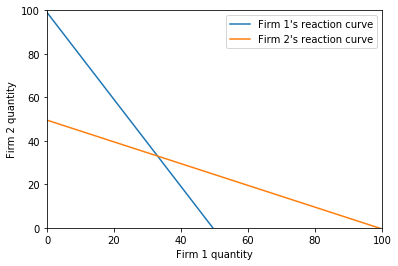

In [23]:
#I choose 1000 values between 0 and 100 as x
x = np.linspace(0, 100, 1000);

#Then I plot these as a line plot
reaction_plot(q_other=x,scatter=False)

This plot shows us visually that the conclusion that the equilibrium can be found where both firms produce 33 holds up. This is given a set of parameters though, and it might be nice to see how the equilibrium behaves, when we change these. In peticualar, changes to b can show what happens when the firms goods are not perfect substitutes. Therefore we make the plot interactive below.

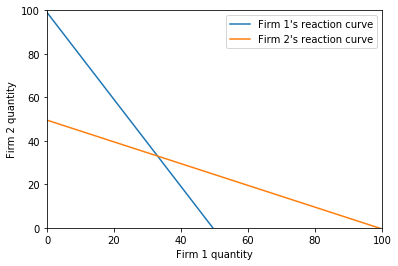

<function __main__.reaction_plot(q_other, a=100, b=1, cost=1, scatter=True, price=False)>

In [24]:
#We define some sliders for the parameters
ai_slider = widgets.IntSlider(min=10,max=150,step=1,value=100)
bi_slider = widgets.FloatSlider(min=0,max=1,step=0.1,value=1)
costi_slider = widgets.IntSlider(min=1,max=50,step=1,value=1)

#Here we call the intercat function on the reaction_plot function, to get an interactive plot. We fix the input of the other 
# firm is to be x again, and the plot is to be a line. 
widgets.interact(reaction_plot,q_other=widgets.fixed(x),a=ai_slider,b=bi_slider,cost=costi_slider, scatter = widgets.fixed(False), price = widgets.fixed(False))



# Prices

The Cournot equilibrium is mostly concerned with figuring out the qunatity of product that the firms should produce. But it is also possible to calculate the price of the product in equilibrium, given a set of parameters. 

In [25]:
#Here we put in the price and the symbollic estimation of it. We use sympy to substitute q1 for the optimal q1 and q2
# into the price functions
price_1 = p1.subs([(q1,sol1_subs_solve[0]), (q2, sol1_subs_solve[0])])
price_1


In [26]:
#Then we substitute in the prices in the profit function
pi = pi1.subs([(p1,price_1), (q1,sol1_subs_solve[0])])
pi

The price in equilibrium only depends on the 3 paramters a, b and c. We therefore write a function that takes these arguments and returns the equilibrium price.

In [27]:
def price_eq(q_other, a = 100, b = 1, cost = 1):
    """This function calculates the price, and the quantity in the cournot equilibrum, given firm 2s quantity and
        some parameter. It prints the results nicely. There is also a check of whether or not prices are above 0, which they
        should be.
        
    args: 
        q_other = the quantity of the other firm 
        a = a parameter from the pricefunction, default is 100
        b = a parameter determening the substituttion elsticity between firm 1 and firm 2s goods
        cost = the two firms cost of producing a unit
    
    """
    
    #We begin by calculating firm 1s quantity given firm 2s produciton
    q = reaction(q_other, a, b, cost)
    
    #We then calculate the price 
    price = round(a/3 + (2*cost)/3,0)

    #Then we calculate the counot equilibrium given a, b and cost
    opt_q = optimal(a, b, cost, text = False)
    
    #If prices are above 0 we print the price and q in equilibrium, and the quantity that the firms will produce, given 
    # the current production of firm 2 (q_other)
    if price > 0:
        print("The price in the Cournot equilibrium is",price)
        print("The quantity that the two firms will produce in the Cournot equilibrium is",opt_q)
        print("When firm 2 produces",q_other,"then firm 1 will produce",q)
    else:
        print("Price can't be negative")
    

In [28]:
#I define some slideres for the interactive calculator
qp_slider = widgets.IntSlider(min=10,max=101,step=1,value=50)
ap_slider = widgets.IntSlider(min=10,max=100,step=1,value=100)
bp_slider = widgets.FloatSlider(min=0,max=1,step=0.1,value=1)
costp_slider = widgets.IntSlider(min=1,max=50,step=1,value=1)

#I use the interact function on the price_eq function, using the sliders previously defined 
widgets.interact(price_eq,q_other=qp_slider, a = ap_slider, b= bp_slider, cost = costp_slider)

The price in the Cournot equilibrium is 34.0
The quantity that the two firms will produce in the Cournot equilibrium is 33.0
When firm 2 produces 50 then firm 1 will produce 24.5


<function __main__.price_eq(q_other, a=100, b=1, cost=1)>

The calcultor can be used to se how prices and the equilibrium will react to changes in the parameters. 

In [29]:
#definition of the cost which is a function of the quantity
#here n is the quantity and C the cost. The letters are not the same as before to avoid conflict
def cost(n,C) :
    if n == 0:
        cost = 0
    else:
        cost = C*n
    return cost

In [30]:
#definition of the demand function
#we take our price function (a-b*(q1+q2)) and set a=1 in this exercice. b is a coefficient which represent the impact of the quantity on the price
#Indeed less a production is rare less the price will be. We can also add a coefficient "k" which can represent the heterogeneity
#between q1 and q2 but we will juste assume the perfect substitution in our problem set
def demand(n1,n2,B):
    return 1 - B*(n1+n2)

In [31]:
#we define the profit as the demand function minus the cost function given the quantity n1, n2, the cost C and B.
def profit1(n1,n2,C,B):
    return demand(n1,n2,B)*n1 - cost(n1,C)

In [32]:
#As priviously, in a cournot model the firms set their quantities (production) given the quantity of the other firm.
#Which is why we need the reaction function and to get it we have to maximize (here minimize -f(x)) the profit function.
def reacfunction(n1,n2,C,B):
    x1 = optimize.brute(lambda n1: -profit1(n1,n2,C,B), ((0,1,),)) # brute minimizes the function;
    return x1[0]

In [33]:
#we define a vector which take the vector first guess and the vector parameters (that we will define after) as input for our model
def vector_reaction(x,param):
    return np.array(x)-np.array([reacfunction(x[0],x[1],param[1],param[0]),reacfunction(x[1],x[0],param[2],param[0])])

In [34]:
#we create a vector with the value of the parameters 
#it has to be [B, C1, C2]
param = [0.01,0.0,0.0]
#we create a vectore with the two initial guess of n1 and n2
x0 = [0.3, 0.3]

#we solve this model given our param vector and the initial guess to get the equilibrium
answer = optimize.fsolve(vector_reaction, x0, args = (param))
answer

array([33.33330078, 33.33330078])

In [35]:
#The result is pretty closed of the equilibrium which is 33/33